In [11]:
pip install --force-reinstall numpy==1.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow-intel 2.11.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.5.0 which is incompatible.
credit-card 0.0.1 requires dill==0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
credit-card 0.0.1 requires pymongo==4.2.0, but you have pymongo 3.13.0 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#import data
data = pd.read_csv(r'D:\ineuron\Placement related assignment\sample code\Q1\archive\instagram_reach.csv')

In [7]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB
None


#### The column in  dataset has all non null value except  column Caption

#### Data Cleaning 
#### Deleting "unnamed","S.No columns"

In [9]:
#because there is only 6 main features (columns), "Unnamed:0" and "S.No" columns will removed
data1 = data.copy()
data1.drop(['Unnamed: 0','S.No'],inplace=True,axis=1)


In [10]:
#only Caption column that has missing values so missing values will be dropped
data1=data1.dropna()

In [11]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB
None


### removing hours and typecasting to int


In [12]:
data1['Time since posted'] = data1['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [13]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     int64 
 5   Likes              94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB
None


C:\Users\pc\AppData\Local\Temp\ipykernel_11524\3569043660.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Followers'])


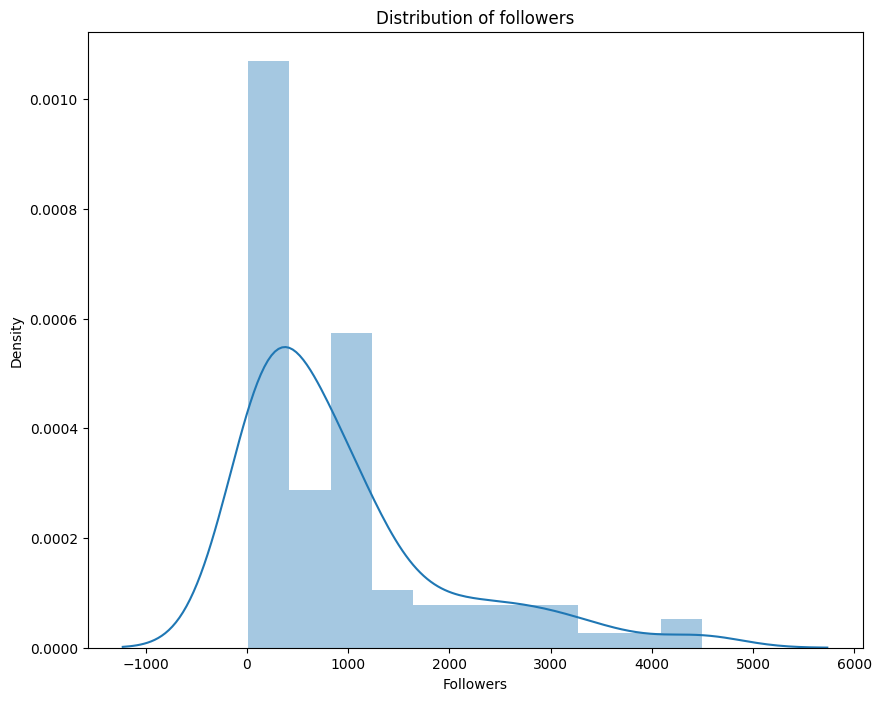

In [17]:
#Distribution of followers variable
plt.figure(figsize=(10, 8))
sns.distplot(data1['Followers'])
plt.title("Distribution of followers")
plt.show()

#### The followers distribution in right skewed. Most of the account has followers between 0-300 or more

#### Time_since_posted_in_hours variable

C:\Users\pc\AppData\Local\Temp\ipykernel_11524\380757844.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Time since posted'])


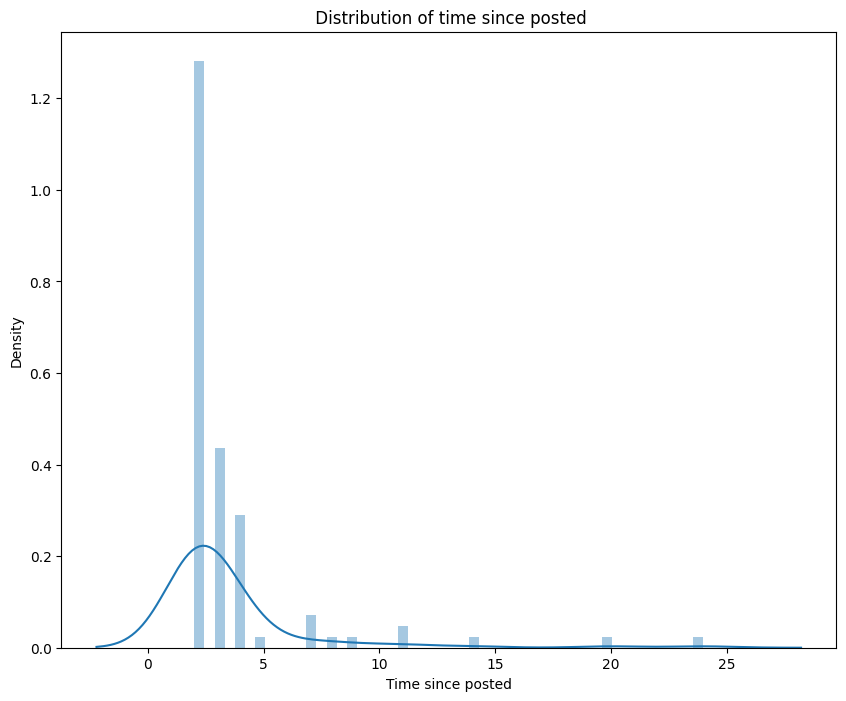

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(data1['Time since posted'])
plt.title(' Distribution of time since posted')
plt.show()

#### The Time since posted  distribution is right skewed

#### Username variable


In [19]:
print('There are', data1['USERNAME'].nunique(), 'username')

There are 90 username


#### Out of 94 data, there are 90 unique users which is a lot

#### Times since posted in hours and likes

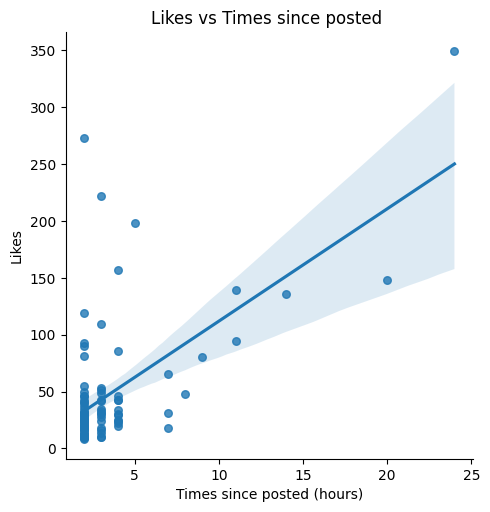

In [20]:
sns.lmplot(x='Time since posted', y='Likes', data=data1, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

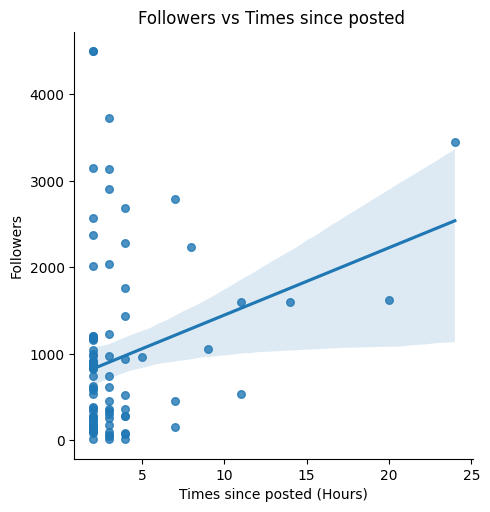

In [21]:
sns.lmplot(x='Time since posted', y='Followers', data=data1, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Followers vs Times since posted ')
plt.xlabel('Times since posted (Hours)')
plt.ylabel('Followers')
plt.show()

#### There is linear relationship between times since posted and likes. Some data shows no relationship between these two

#### Correlation values between times since posted, follower, and likes

C:\Users\pc\AppData\Local\Temp\ipykernel_11524\2305461277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(),cmap="YlGnBu", annot=True)


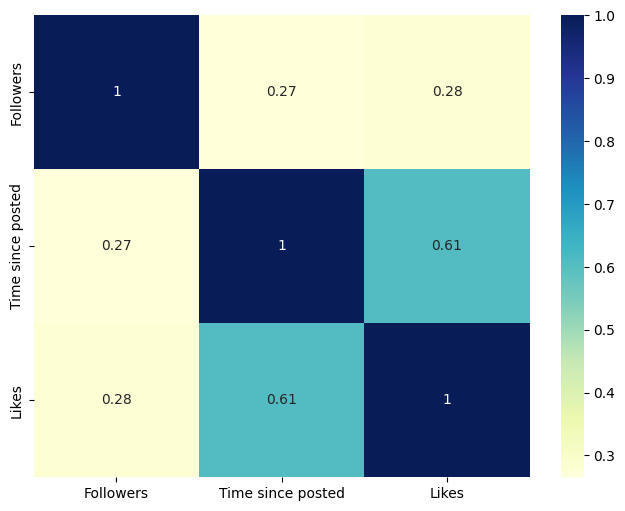

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(data1.corr(),cmap="YlGnBu", annot=True)
plt.show()

#### There is strong correlation between likes and times since posted in hours

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [27]:
#Define x variables and y variable
x = data1[['Followers', 'Time since posted']]
y = data1['Likes']


#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#### Linear Regression

In [29]:
linreg=LinearRegression()
stdSc = StandardScaler()
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.transform(X_test)
linreg.fit(X_train,y_train)
#Defining  model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluating  the model
scores = cross_val_score(linreg, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#cal Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.4f (%.4f)' % (scores.mean(), scores.std()) )

Mean MAE: 14.8677 (12.5414)


In [31]:
#Define x variables and y variable
x1 = data1[['Followers', 'Likes']]
y1 = data1['Time since posted']

#Split train set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=1)

In [32]:
linreg1=LinearRegression()
stdSc = StandardScaler()
X1_train = stdSc.fit_transform(X1_train)
X1_test = stdSc.transform(X1_test)
linreg1.fit(X1_train,y1_train)
#Defining  model evaluation method
cv1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluating  the model
scores1 = cross_val_score(linreg1, X1_test, y1_test, scoring='neg_mean_absolute_error', cv=cv1, n_jobs=-1)
#cal Absolute MAE
scores1 = absolute(scores)
print('Mean MAE1: %.4f (%.4f)' % (scores.mean(), scores.std()) )

Mean MAE1: 14.8677 (12.5414)


In [70]:
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(gbr , X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

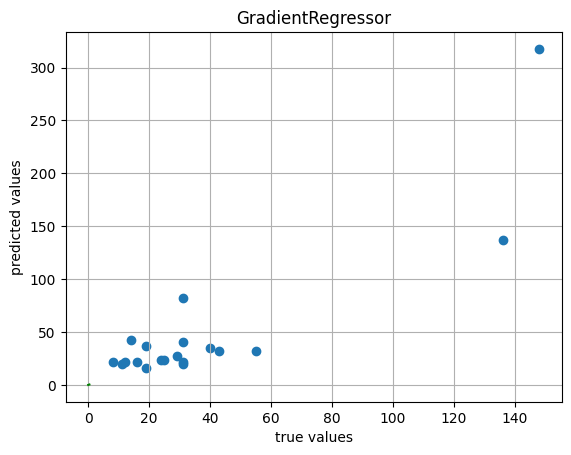

In [71]:
# doing Some Benchmarks
predictions = gbr.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

#### From Benchmarks this seems the model though not perfectis still workable.

In [72]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 13.423 (7.676)


In [ ]:
#Linear Regression model is not better than GRBoost